### Data Loading

In [93]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from collections import defaultdict
from scipy import optimize
from scipy.io import loadmat # MATLAB mat datafile format
from surprise import Dataset, SVD, SVDpp, NMF
from surprise.model_selection import cross_validate, KFold
from tabulate import tabulate

## Main Task

In [96]:
dataset = "ml-100k"
movielens_ds = Dataset.load_builtin(dataset)
trainset = movielens_ds.build_full_trainset()

Algorithms comparison

In [76]:
algos = (
    SVD(random_state=0, n_factors=100, n_epochs=20, biased=True),
    SVD(random_state=0, n_factors=100, n_epochs=20, biased=False),
    SVD(random_state=0, n_factors=100, n_epochs=10, biased=True),
    SVD(random_state=0, n_factors=100, n_epochs=30, biased=True),
    SVD(random_state=0, n_factors=50, n_epochs=20, biased=True),
    SVD(random_state=0, n_factors=150, n_epochs=20, biased=True),
    SVDpp(random_state=0, n_factors=20, n_epochs=20, cache_ratings=True),
    SVDpp(random_state=0, n_factors=20, n_epochs=20, cache_ratings=False),
    SVDpp(random_state=0, n_factors=15, n_epochs=20, cache_ratings=True),
    SVDpp(random_state=0, n_factors=25, n_epochs=20, cache_ratings=True),
    SVDpp(random_state=0, n_factors=20, n_epochs=15, cache_ratings=True),
    SVDpp(random_state=0, n_factors=20, n_epochs=25, cache_ratings=True),
    NMF(random_state=0, n_factors=15, n_epochs=50, biased=False),
    NMF(random_state=0, n_factors=15, n_epochs=50, biased=True),
    NMF(random_state=0, n_factors=10, n_epochs=50, biased=False),
    NMF(random_state=0, n_factors=20, n_epochs=50, biased=False),
    NMF(random_state=0, n_factors=15, n_epochs=25, biased=False),
    NMF(random_state=0, n_factors=15, n_epochs=75, biased=False),
)

kf = KFold(random_state=0)

In [80]:
stable = "https://surprise.readthedocs.io/en/stable/"
LINK = {
    "SVD": "[{}]({})".format(
        "SVD",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD",
    ),
    "SVDpp": "[{}]({})".format(
        "SVD++",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVDpp",
    ),
    "NMF": "[{}]({})".format(
        "NMF",
        stable
        + "matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.NMF",
    ),
    "ml-100k": "[{}]({})".format(
        "Movielens 100k", "https://grouplens.org/datasets/movielens/100k"
    ),
}

In [81]:
table = []
for algo in algos:
    start = time.time()
    out = cross_validate(algo, movielens_ds, ["rmse", "mae"], kf, n_jobs=-1)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[algo.__class__.__name__]
    mean_rmse = "{:.3f}".format(np.mean(out["test_rmse"]))
    mean_mae = "{:.3f}".format(np.mean(out["test_mae"]))

    new_line = [link, mean_rmse, mean_mae, cv_time]
    table.append(new_line)

header = [LINK[dataset], "RMSE", "MAE", "Time"]
print(tabulate(table, header, tablefmt="pipe"))

| [Movielens 100k](https://grouplens.org/datasets/movielens/100k)                                                                        |   RMSE |   MAE | Time    |
|:---------------------------------------------------------------------------------------------------------------------------------------|-------:|------:|:--------|
| [SVD](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)     |  0.934 | 0.737 | 0:00:05 |
| [SVD](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)     |  0.948 | 0.747 | 0:00:04 |
| [SVD](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)     |  0.946 | 0.748 | 0:00:03 |
| [SVD](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)     |  0.941 | 0.739 | 0:00:06 |
| [S

### Conclusion: best results of cross validation in terms of accuracy shows SVD++ algorithm with number of iteration of the SGD procedure but it's very time consuming. Default SVD algorithm is much faster and shows only 1.8% less accuracy.

### SVD++ Algorithm (Singular Value Deconposition taking into account implicit ratings)

In [83]:
algo_svdpp = SVDpp(n_epochs=15, cache_ratings=True)

In [84]:
cross_validate(algo_svdpp, movielens_ds, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9178  0.9203  0.9128  0.9194  0.9175  0.9176  0.0026  
MAE (testset)     0.7215  0.7230  0.7166  0.7262  0.7233  0.7221  0.0032  
Fit time          11.28   11.22   11.06   10.98   11.11   11.13   0.11    
Test time         2.92    2.97    2.97    2.86    2.88    2.92    0.05    


{'test_rmse': array([0.91780938, 0.92031211, 0.91283801, 0.91941594, 0.91745679]),
 'test_mae': array([0.72151479, 0.72297916, 0.71656763, 0.72623663, 0.72333618]),
 'fit_time': (11.284884452819824,
  11.218847274780273,
  11.05781865119934,
  10.977959394454956,
  11.105782985687256),
 'test_time': (2.9211461544036865,
  2.972060441970825,
  2.971113443374634,
  2.8608908653259277,
  2.8815836906433105)}

Prediction

In [86]:
algo_svdpp.fit(trainset)

uid = str(196)
iid = str(302)

pred = algo_svdpp.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.04   {'was_impossible': False}


### SVD Algorithm

In [87]:
algo_svd = SVD()

In [88]:
cross_validate(algo_svd, movielens_ds, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=-1)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9361  0.9351  0.9398  0.9320  0.9334  0.9353  0.0027  
MAE (testset)     0.7381  0.7381  0.7409  0.7326  0.7365  0.7373  0.0027  
Fit time          0.66    0.69    0.63    0.60    0.57    0.63    0.04    
Test time         0.12    0.11    0.11    0.11    0.13    0.12    0.01    


{'test_rmse': array([0.93607786, 0.93505666, 0.93977746, 0.93199073, 0.93337186]),
 'test_mae': array([0.73811766, 0.73813958, 0.74089915, 0.73260597, 0.73652427]),
 'fit_time': (0.6631958484649658,
  0.6934163570404053,
  0.6285836696624756,
  0.6038334369659424,
  0.5698974132537842),
 'test_time': (0.1200108528137207,
  0.10710906982421875,
  0.11106133460998535,
  0.11164140701293945,
  0.13442778587341309)}

Prediction

In [98]:
algo_svd.fit(trainset)

uid = str(196)
iid = str(302)

pred = algo_svd.predict(uid, iid, r_ui=4, verbose=True)

user: 196        item: 302        r_ui = 4.00   est = 4.13   {'was_impossible': False}


#### Recommendations based on SVD algorithm

Function to show top N recommendations

In [94]:
def get_top_n(predictions, n=15):
    """
    Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 15.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

Predict ratings for all user-movie pairs (u, i) that are NOT in the training set.

In [99]:
testset = trainset.build_anti_testset()
predictions = algo_svd.test(testset)

top_n = get_top_n(predictions, n=10)

Print the recommended items for each user

In [100]:
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

196 ['318', '313', '50', '603', '178', '189', '169', '515', '272', '408']
186 ['69', '318', '485', '408', '1137', '528', '705', '50', '286', '114']
22 ['318', '64', '357', '12', '496', '169', '170', '124', '313', '178']
244 ['603', '408', '134', '654', '657', '647', '963', '178', '488', '507']
166 ['169', '408', '603', '318', '7', '174', '79', '657', '178', '493']
298 ['64', '170', '272', '114', '313', '251', '480', '633', '515', '487']
115 ['179', '134', '474', '209', '483', '114', '135', '223', '180', '603']
253 ['320', '515', '272', '513', '313', '408', '114', '166', '493', '191']
305 ['136', '114', '603', '646', '430', '515', '641', '936', '1019', '657']
6 ['603', '657', '654', '709', '1142', '647', '641', '632', '607', '1194']
62 ['169', '137', '178', '185', '919', '187', '189', '408', '234', '480']
286 ['515', '178', '12', '486', '60', '114', '318', '513', '520', '603']
200 ['199', '513', '64', '144', '963', '603', '1142', '479', '316', '194']
210 ['64', '480', '603', '178', '923

## Additional Task

### Recommender system

Implementation of the collaborative filtering learning algorithm and its implementation to a dataset of movie ratings ([MovieLens 100k Dataset](https://grouplens.org/datasets/movielens/) from GroupLens Research). This dataset consists of ratings on a scale of 1 to 5. The dataset has $n_u = 943$ users, and $n_m = 1682$ movies.

In this task, will be implemented of the function `cofi_cost_func` that computes the collaborative filtering objective function and gradient. After implementing the cost function and gradient, `scipy.optimize.minimize` is used to learn the parameters for collaborative filtering.

### Data Processing

Import datasets

In [9]:
names_list = "data/movie_ids.txt"
ratings = "data/movies.mat"

Function to subtract the mean rating for each movie

In [10]:
def norm_ratings(Y, R):
    """
    Preprocess data by subtracting mean rating for each movie 
    (every row).

    Parameters
    ----------
    Y : array_like
        The user rating for all movies. A matrix of shape 
        num_movies x num_users.
    R : array_like
        Indicator matrix for movies rated by users. A matrix of 
        shape num_movies x num_users.
        
    Returns
    -------
    Ynorm : array_like
        A matrux of same shape as Y after mean normalization.
    Ymean : array_like
        A vector of shape (num_movies, ) containing the mean rating 
        for each movie.
    """
    m, n = Y.shape
    Ymean = np.zeros(m)
    Ynorm = np.zeros(Y.shape)

    for i in range(m):
        idx = R[i, :] == 1
        Ymean[i] = np.mean(Y[i, idx])
        Ynorm[i, idx] = Y[i, idx] - Ymean[i]

    return Ynorm, Ymean

Function to load movie names

In [11]:
def load_movies(file_name):
    """
    Reads a movie list in 'movie_ids.txt' file and returns a list of 
    movie names.
    
    Returns
    -------
    movie_names : list
        A list of strings representating all movie names.
    """
    with open(file_name,  encoding="ISO-8859-1") as fd:
        movies = fd.readlines()

    movie_names = []
    for movie in movies:
        parts = movie.split(maxsplit=1)
        movie_names.append(parts[1].strip())
    return movie_names

Function to calculate gradient

In [12]:
def numerical_gradient(J, w, e=1e-4):
    """
    Computes the gradient using "finite differences" ad gives a numerical 
    estimate of the gradient.

    Parameters
    ----------
    J : func
        A cost function for estimation of the numerical gradient.
    w : array_like
        Weight - one-dimensional unrolled network paramenets. 
        The numerical gradient is computed at those given parameters.
    e: float (optional)
        A value to use as epsilon for computing the finite difference.

    Returns
    -------
    numgrad : array_like
        The numerical gradient with respect to weights. Has same shape as weights.
        
    Notes
    -----
        The following code implements numerical gradient checking and returns
        the numerical gradient. It sets 'numgrid[i]' to (a numerical 
        approximation of) the partial derivative of J with respect to the i-th
        input argument evaluated at weights (i.e., 'numgrad[i]' should be 
        (approximately) the partial derivative of J with respect to weights[i]).
    """
    numgrad = np.zeros(w.shape)
    perturb = np.diag(e * np.ones(w.shape))
    for i in range(w.size):
        loss1, _ = J(w - perturb[:, i])
        loss2, _ = J(w + perturb[:, i])
        numgrad[i] = (loss2 - loss1) / (2 * e)
    return numgrad


Cost function check

In [13]:
def check_cost_func(cofi_cost_func, lambda_=0.0):
    """
    Creates a collaborative filtering problem to check the cost function and
    gradients. Outputs the analytical gradients produced by the code and
    the numerical gradients (computed using 'numerical_gradient' function).
    These two gradient computations should result in very similar values.
    
    Parameters
    ----------
    coef_cost_func : func
        Implementation of the cost function.
    lambda_ : float (optional)
        The regularization parameter.
    """
    # Create small problem
    X_t = np.random.rand(4, 3)
    W_t = np.random.rand(5, 3)

    # Zap out most entries
    Y = np.dot(X_t, W_t.T)
    Y[np.random.rand(*Y.shape) > 0.5] = 0
    R = np.zeros(Y.shape)
    R[Y != 0] = 1

    # Run gradient check
    X = np.random.randn(*X_t.shape)
    W = np.random.randn(*W_t.shape)
    num_movies, num_users = Y.shape
    num_feats = W_t.shape[1]

    params = np.concatenate([X.ravel(), W.ravel()])
    numgrad = numerical_gradient(
        lambda x: cofi_cost_func(x, Y, R, num_users, num_movies, num_feats, lambda_),
        params,
    )
    cost, grad = cofi_cost_func(
        params, Y, R, num_users, num_movies, num_feats, lambda_
    )

    print("Numeriacal Gradient - Left / Analytical Gradient - Right")
    print("Hint: the two columns below should be very similar")
    print(np.stack([numgrad, grad], axis=1))
    
    diff = np.linalg.norm(numgrad - grad) / np.linalg.norm(numgrad + grad)
    print(
        "In case of correct implementation of cost function, relative difference is less than 1e-9"
    )
    print(f"Relative difference: {diff}")

### 1. Movie ratings dataset

Loading of the dataset `movies.mat`, providing the variables `Y` and `R`.
The matrix `Y` (a `num_movies` $\times$ `num_users` matrix) stores the ratings $y^{(i,j)}$ (from 1 to 5). The matrix `R` is an binary-valued indicator matrix, where $R(i, j) = 1$ if user $j$ gave a rating to movie $i$, and $R(i, j) = 0$ otherwise. The objective of collaborative filtering is to predict movie ratings for the movies that users have not yet rated, that is, the entries with $R(i, j) = 0$. This will allow us to recommend the movies with the highest predicted ratings to the user.

In [14]:
movie_names = load_movies(names_list)
movie_data = loadmat(ratings)
Y, R = movie_data['Y'], movie_data['R']

Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 943 users.
R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a rating to movie i.

In [15]:
print(Y.shape, R.shape)
len(movie_names)

(1682, 943) (1682, 943)


1682

For better understanding of the matrix `Y`, the following cell will compute the average movie rating for the first movie (Toy Story) and print its average rating.

In [16]:
m_nr = 1
print(f"Average rating for movie {m_nr} '{movie_names[m_nr-1]}': %f / 5" %
      np.mean(Y[m_nr-1, R[m_nr-1] == 1]))

Average rating for movie 1 'Toy Story (1995)': 3.878319 / 5


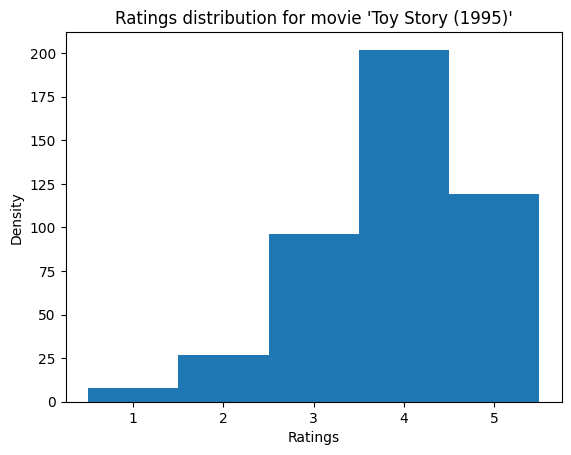

In [17]:
plt.hist(Y[m_nr-1, R[m_nr-1] == 1], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
plt.title(f"Ratings distribution for movie '{movie_names[m_nr-1]}'")
plt.xlabel("Ratings")
plt.ylabel("Density")
plt.show()

Visualization of the ratings matrix

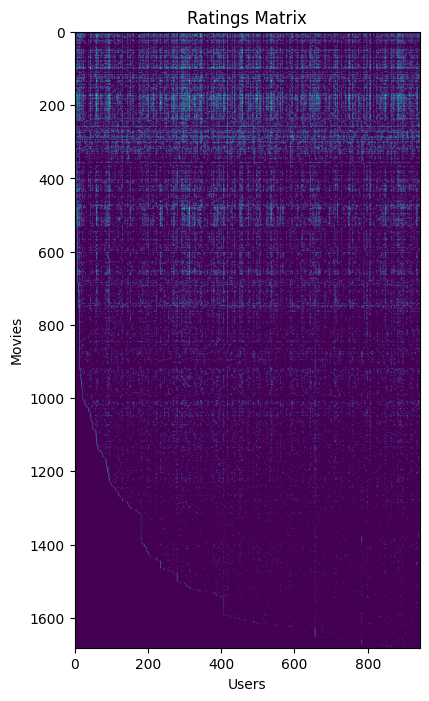

In [18]:
plt.figure(figsize=(8, 8))
plt.imshow(Y)
plt.title("Ratings Matrix")
plt.ylabel('Movies')
plt.xlabel('Users')
plt.show()

Throughout this part of the exercise, we will be working with the matrices, `X` and `W`:

$$ \text{X} =
\begin{bmatrix}
- \left(x^{(1)}\right)^T - \\
- \left(x^{(2)}\right)^T - \\
\vdots \\
- \left(x^{(n_m)}\right)^T - \\
\end{bmatrix}, \quad
\text{W} =
\begin{bmatrix}
- \left(w^{(1)}\right)^T - \\
- \left(w^{(2)}\right)^T - \\
\vdots \\
- \left(w^{(n_u)}\right)^T - \\
\end{bmatrix}.
$$

The $i^{th}$ row of `X` corresponds to the feature vector $x^{(i)}$ for the $i^{th}$ movie, and the $j^{th}$ row of `W` corresponds to one parameter vector $w^{(j)}$, for the $j^{th}$ user. Both $x^{(i)}$ and $w^{(j)}$ are n-dimensional vectors. For the purposes of this exercise, we will use $n = 100$, and therefore, $x^{(i)} \in \mathbb{R}^{100}$ and $w^{(j)} \in \mathbb{R}^{100}$. Correspondingly, `X` is a $n_m \times 100$ matrix and `W` is a $n_u \times 100$ matrix.

### 2 Collaborative filtering learning algorithm

Implementation of the collaborative filtering learning algorithm qis done step by step. First, the cost function (without regularization) it's implemented.

The collaborative filtering algorithm in the setting of movie recommendations considers a set of n-dimensional parameter vectors $x^{(1)}, \dots, x^{(n_m)}$ and $w^{(1)} , \dots, w^{(n_u)}$, where the model predicts the rating for movie $i$ by user $j$ as $y^{(i,j)} = \left( w^{(j)} \right)^T x^{(i)}$. Given a dataset that consists of a set of ratings produced by some users on some movies, we wish to learn the parameter vectors $x^{(1)}, \dots, x^{(n_m)}, w^{(1)}, \dots, w^{(n_u)}$ that produces the best fit (minimizes the squared error).

The code in `cofi_cost_func` is computing the cost function and gradient for collaborative filtering. The parameters to the function (i.e., the values that algorithm is trying to learn) are `X` and `W`. In order to use an off-the-shelf minimizer such as `scipy`'s `minimize` function, the cost function has been set up to unroll the parameters into a single vector called `params`. The same vector was previously used for unrolling method in the neural networks programming exercise.

#### Complete collaborative filtering cost function

In [19]:
def cofi_cost_func(params, Y, R, num_users, num_movies, num_feats, lambda_=0.0):
    """
    Collaborative filtering cost function.

    Parameters
    ----------
    params : array_like
        The parameters to be optimized. This is a one-dimensional vector
        of shape (num_mocies x num_users, 1). It's the concatenation of
        the feature vectors X and weights W.
    Y : array_like
        A matrix of shape (num_movies x num_users) of user ratings of movies.
    R : array_like
        A (num_movies x num_users) matrix, where R[i, j] = 1 if the i-th movie
        was rated by the j-th user.
    num_users : int
        Total number of users.
    num_movies : int
        Total number of movies.
    num_fears : int
        Number of features to learn.
    lambda_ : float (optional)
        The regularization oefficient.

    Returns
    -------
    J : float
        Value of the cost function at the given parameters.
    G : array_like
        Gradient vector of the cost function at the given parameters.
        G has a shape (num_movies x num_users, 1)

    Instructions
    ------------
    Cost function and gradient are computed for collaborative filtering.
    First, the cost function (without regularization) is implemented and 
    checked if it matches the costs. Then, the gradient is implemented 
    and 'check_cost_func' routine used to check the gradient is correct.
    Finally, the regularization is implemented.

    Notes
    -----
    - The input parameters are decomposed into two matrices:
        X : (num_movies x num_feats) matrix of movie features
        W : (num_users x num_feats) matrix of user features
    - The following variables are set:
        X_grad : (num_movies x num_feats) matrix containing the partial
                derivatives w.r.t. for each element of X
        W_grad : (num_users x num_feats) matrix containing the partial
                derivatives w.r.t. for each element of W
    - The returned gradient is the concatenation of the raveled gradients
      X_grad and W_grad.
    """
    # Cost function

    # Unfolding of X and W matrices from params
    X = params[:num_movies*num_feats].reshape(num_movies, num_feats)
    W = params[num_movies*num_feats:].reshape(num_users, num_feats)

    # Collaborative filtering cost function
    J = 1 / 2 * np.sum(np.square((X @ W.T - Y) * R)) + \
        lambda_ / 2 * (np.sum(np.square(X)) + np.sum(np.square(W)))
    
    # Gradient

    # Blank matrices for calculation of the gradient
    X_grad = np.zeros(X.shape)
    W_grad = np.zeros(W.shape)
    
    # Gradient for the features of movies
    for i in range(R.shape[0]):
        idx = np.where(R[i, :] == 1)[0]
        W_temp = W[idx, :]
        Y_temp = Y[i, idx]
        X_grad[i, :] = (X[i, :] @ W_temp.T - Y_temp) @ W_temp + lambda_ * X[i, :]

    # Gradient for the weights given to each feature by users
    for j in range(R.shape[1]):
        idx = np.where(R[:, j] == 1)[0]
        X_temp = X[idx, :]
        Y_temp = Y[idx, j]
        W_grad[j, :] = (X_temp @ W[j, :] - Y_temp) @ X_temp + lambda_ * W[j, :]

    # Complete collaborative filtering gradient
    G = np.concatenate([X_grad.ravel(), W_grad.ravel()])

    return J, G

During development of the cost functions, the following steps were implemented.

#### 2.1 Collaborative filtering cost function

The collaborative filtering cost function (without regularization) is given by

$$
J(x^{(1)}, \dots, x^{(n_m)}, w^{(1)}, \dots, w^{(n_u)}) = \frac{1}{2} \sum_{(i,j):r(i,j)=1} \left( \left(w^{(j)}\right)^T x^{(i)} - y^{(i,j)} \right)^2
$$

The function `cofi_cost_func` returns this cost in the variable `J`. The cost is accumulating for user $j$ and movie $i$ only if `R[i,j] = 1`.

**Implementation Note**: A vectorized implementation is used to compute $J$, since it will later be called many times by `scipy`'s optimization package. As usual, it might be easiest to first write a non-vectorized implementation (to make sure getting the right answer), and to modify it to become a vectorized implementation (checking that the vectorization steps do not change the algorithm’s output). To come up with a vectorized implementation, the following tip might be helpful: the $R$ matrix can be used to set selected entries to 0. For example, `R * M` will do an element-wise multiplication between `M` and `R`; since `R` only has elements with values either 0 or 1, this has the effect of setting the elements of M to 0 only when the corresponding value in R is 0. Hence, `np.sum(R * M)` is the sum of all the elements of `M` for which the corresponding element in `R` equals 1.

#### 2.2 Collaborative filtering gradient

Implementation of the gradient (without regularization). Specifically, the bottom part of the code in `cofi_cost_func` is completed to return the variables `X_grad` and `W_grad`. Where `X_grad` is a matrix of the same size as `X` and similarly, `W_grad` is a matrix of the same size as
`W`. The gradients of the cost function are given by:

$$ \frac{\partial J}{\partial x_k^{(i)}} = \sum_{j:r(i,j)=1} \left( \left(w^{(j)}\right)^T x^{(i)} - y^{(i,j)} \right) w_k^{(j)} $$

$$ \frac{\partial J}{\partial w_k^{(j)}} = \sum_{i:r(i,j)=1} \left( \left(w^{(j)}\right)^T x^{(i)}- y^{(i,j)} \right) x_k^{(j)} $$

The function returns the gradient for both sets of variables by unrolling them into a single vector. After completion of the code to compute the gradients, the next cell runs a gradient check (available in `check_cost_func`) to numerically check the implementation of the gradients (this is similar to the numerical check that was used in the neural networks exercise). If the implementation is correct, the analytical and numerical gradients should match up closely.

**Implementation Note:** This assignment can be completed without using a vectorized implementation, but the code will run much more slowly (several hours), and so it's recommended to vectorize the implementation. To get started, the gradient can be implemented with a for-loop over movies (for computing $\frac{\partial J}{\partial x^{(i)}_k}$) and a for-loop over users (for computing $\frac{\partial J}{w_k^{(j)}}$). During the first implementation of the gradient, an unvectorized version can be used by implementing another inner for-loop that computes each element in the summation. After completion of the gradient computation this way, the implementation is vectorized (vectorization of the inner for-loops), at the end only two for-loops remained (one for looping over movies to compute $\frac{\partial J}{\partial x_k^{(i)}}$ for each movie, and one for looping over users to compute $\frac{\partial J}{\partial w_k^{(j)}}$ for each user).

**Implementation Tip:** To perform the vectorization, should be implemented computing of all the derivatives associated with $x_1^{(i)} , x_2^{(i)}, \dots , x_n^{(i)}$ (i.e., the derivative terms associated with the feature vector $x^{(i)}$) at the same time. Definition of the derivatives for the feature vector of the $i^{th}$ movie:

$$ \left(X_{\text{grad}} \left(i, :\right)\right)^T =
\begin{bmatrix}
\frac{\partial J}{\partial x_1^{(i)}} \\
\frac{\partial J}{\partial x_2^{(i)}} \\
\vdots \\
\frac{\partial J}{\partial x_n^{(i)}}
\end{bmatrix} = \quad
\sum_{j:r(i,j)=1} \left( \left( w^{(j)} \right)^T x^{(i)} - y^{(i,j)} \right) w^{(j)}
$$

Vectorization of the above expression is started by indexing into `W` and `Y` to select only the elements of interests (that is, those with `r[i, j] = 1`). Intuitively, to consider the features for the $i^{th}$ movie, it's needed to be concerned about the users who had given ratings to the movie, and this allows to remove all the other users from `W` and `Y`.

Specifically, to set `idx = np.where(R[i, :] == 1)[0]` as a list of all the users that have rated movie $i$. This allows to create the temporary matrices `W_temp = W[idx, :]` and `Y_temp = Y[i, idx]` that index into `W` and `Y` to return only the set of users which have rated the $i^{th}$ movie. This will allows to write the derivatives as:

`X_grad[i, :] = (X[i, :] @ W_temp.T - Y_temp) @ W_temp`

Vectorized computation above returns a row-vector instead. After vectorization of the computations of the derivatives with respect to $x^{(i)}$, a similar method is used to vectorize the derivatives with respect to $w^{(j)}$ as well.

Verification of the cost function without regularization

In [20]:
check_cost_func(cofi_cost_func=cofi_cost_func)

Numeriacal Gradient - Left / Analytical Gradient - Right
Hint: the two columns below should be very similar
[[ 1.46755812e+00  1.46755812e+00]
 [ 1.40741587e+00  1.40741587e+00]
 [ 5.82885073e-01  5.82885073e-01]
 [-7.16315516e-02 -7.16315516e-02]
 [-9.43354336e-01 -9.43354336e-01]
 [-1.39373467e-01 -1.39373467e-01]
 [-1.22032986e+00 -1.22032986e+00]
 [ 9.42491195e-01  9.42491195e-01]
 [ 2.71459638e+00  2.71459638e+00]
 [ 3.67592235e+00  3.67592235e+00]
 [-6.96990691e-01 -6.96990691e-01]
 [-5.67685997e+00 -5.67685997e+00]
 [-1.08120971e+00 -1.08120971e+00]
 [-2.88781485e+00 -2.88781485e+00]
 [ 1.21636663e+00  1.21636663e+00]
 [-1.38633393e-01 -1.38633393e-01]
 [-2.17856654e-01 -2.17856654e-01]
 [ 4.12822144e-03  4.12822143e-03]
 [ 1.06420114e+00  1.06420114e+00]
 [-2.12039548e+00 -2.12039548e+00]
 [ 1.43497454e+00  1.43497454e+00]
 [-3.03560816e-02 -3.03560816e-02]
 [ 5.67789967e-01  5.67789967e-01]
 [-7.64351108e-01 -7.64351108e-01]
 [-1.80141927e+00 -1.80141927e+00]
 [-4.60333314e+00

#### 2.3 Regularized cost function

The cost function for collaborative filtering with regularization is given by

$$ J(x^{(1)}, \dots, x^{(n_m)}, w^{(1)}, \dots, w^{(n_u)}) = \frac{1}{2} \sum_{(i,j):r(i,j)=1} \left( \left( w^{(j)} \right)^T x^{(i)} - y^{(i,j)} \right)^2 + \left( \frac{\lambda}{2} \sum_{j=1}^{n_u} \sum_{k=1}^{n} \left( w_k^{(j)} \right)^2  \right) + \left( \frac{\lambda}{2} \sum_{i=1}^{n_m} \sum_{k=1}^n \left(x_k^{(i)} \right)^2 \right) $$

This egularization is added to the original computations of the cost function, $J$.

#### 2.4 Regularized gradient

After implementing the regularized cost function, implementation of regularization for the gradient is done. It was added to the implementation in `cofi_cost_func` to return the regularized gradient by adding the contributions from the regularization terms. The gradients for the regularized cost function is given by:

$$ \frac{\partial J}{\partial x_k^{(i)}} = \sum_{j:r(i,j)=1} \left( \left(w^{(j)}\right)^T x^{(i)} - y^{(i,j)} \right) w_k^{(j)} + \lambda x_k^{(i)} $$

$$ \frac{\partial J}{\partial w_k^{(j)}} = \sum_{i:r(i,j)=1} \left( \left(w^{(j)}\right)^T x^{(i)}- y^{(i,j)} \right) x_k^{(j)} + \lambda w_k^{(j)} $$

This means that it was just added $\lambda x^{(i)}$ to the `X_grad[i,:]` variable described earlier, and add $\lambda w^{(j)}$ to the `W_grad[j, :]` variable described earlier.

Verification of the cost function with regularization

In [21]:
check_cost_func(cofi_cost_func=cofi_cost_func, lambda_=1.5)

Numeriacal Gradient - Left / Analytical Gradient - Right
Hint: the two columns below should be very similar
[[  0.79111222   0.79111222]
 [ -4.17549058  -4.17549058]
 [-12.81786702 -12.81786702]
 [  1.81266375   1.81266375]
 [ -6.74636362  -6.74636362]
 [ -9.15530812  -9.15530812]
 [ 12.16576809  12.16576809]
 [ -5.04951995  -5.04951995]
 [-15.49006255 -15.49006255]
 [  2.60933207   2.60933207]
 [ -0.28829777  -0.28829777]
 [ -6.25469793  -6.25469793]
 [ -0.84717773  -0.84717773]
 [ 12.24428549  12.24428549]
 [  8.92855335   8.92855335]
 [  5.18960135   5.18960135]
 [ -0.47245307  -0.47245307]
 [ -1.62890325  -1.62890325]
 [ -6.78329898  -6.78329898]
 [  4.49153229   4.49153229]
 [  7.3820756    7.3820756 ]
 [  4.13155947   4.13155947]
 [  2.43421763   2.43421763]
 [  5.61647178   5.61647178]
 [ -0.85973454  -0.85973454]
 [ -0.97259472  -0.97259472]
 [  1.12843307   1.12843307]]
In case of correct implementation of cost function, relative difference is less than 1e-9
Relative differenc

### 3 Learning movie recommendations

After implementation of the collaborative filtering cost function and gradient is finished, training of the algorithm can be done to make movie recommendations.

#### 3.1 Personal preferences

In the next cell, the personal movie preferences are entered, so that later when the algorithm runs, the personal movie recommendations will be obtained! The values are filled in according to own preferences, they only depend on own tastes. The list of all movies and their number in the dataset can be found listed in the file `data/movie_ids.txt`.

In [22]:
size = 20
personal_movie_list = np.random.randint(0, len(movie_names), size=(size,))

for movie in personal_movie_list:
  print(movie_names[movie])

Hate (Haine, La) (1995)
Chairman of the Board (1998)
Carrington (1995)
Babe (1995)
Around the World in 80 Days (1956)
Adventures of Pinocchio, The (1996)
Alaska (1996)
Rough Magic (1995)
Cowboy Way, The (1994)
Annie Hall (1977)
Young Frankenstein (1974)
Horse Whisperer, The (1998)
Wes Craven's New Nightmare (1994)
Big Bang Theory, The (1994)
American Buffalo (1996)
Ruling Class, The (1972)
Smile Like Yours, A (1997)
Much Ado About Nothing (1993)
Paradise Lost: The Child Murders at Robin Hood Hills (1996)
Queen Margot (Reine Margot, La) (1994)


Before training the collaborative filtering model, personal user ratings should be added that correspond to the personal movie list. Own ratings should be given for the movies in own dataset.

In [23]:
personal_ratings = np.zeros(len(movie_names))

for i in personal_movie_list:
    personal_ratings[i] = random.randint(1, 5)

In [24]:
def display_personal_list(movie_names, personal_ratings):
    print("Personal user ratings")
    print("---------------------")
    for i in range(len(movie_names)):
        if personal_ratings[i] > 0:
            print(f"{personal_ratings[i]} stars for {movie_names[i]}")

In [25]:
display_personal_list(movie_names, personal_ratings)

Personal user ratings
---------------------
4.0 stars for Babe (1995)
3.0 stars for Much Ado About Nothing (1993)
4.0 stars for Young Frankenstein (1974)
3.0 stars for Paradise Lost: The Child Murders at Robin Hood Hills (1996)
5.0 stars for Around the World in 80 Days (1956)
3.0 stars for Annie Hall (1977)
4.0 stars for Wes Craven's New Nightmare (1994)
3.0 stars for Carrington (1995)
5.0 stars for Queen Margot (Reine Margot, La) (1994)
3.0 stars for Ruling Class, The (1972)
3.0 stars for Alaska (1996)
4.0 stars for Smile Like Yours, A (1997)
4.0 stars for Adventures of Pinocchio, The (1996)
2.0 stars for Hate (Haine, La) (1995)
5.0 stars for Cowboy Way, The (1994)
4.0 stars for Chairman of the Board (1998)
3.0 stars for Big Bang Theory, The (1994)
2.0 stars for Horse Whisperer, The (1998)
1.0 stars for American Buffalo (1996)
1.0 stars for Rough Magic (1995)


#### 3.2 Recommendations

After the additional ratings have been added to the dataset, the script will proceed to train the collaborative filtering model. This will learn the parameters `X` and `W`. To predict the rating of movie $i$ for user $j$, it's needed to compute $(w^{(j)})^T x^{(i)}$ . The next part of the script computes the ratings for all the movies and users and displays the movies that it recommends (Figure 4), according to ratings that were entered earlier in the script. Each time different set of the predictions can be obtained due to different random initializations.

Input parameters

In [26]:
# Adding personal ratings to Y and R data matrices
Y, R = movie_data["Y"], movie_data["R"]
Y = np.hstack([personal_ratings[:, None], Y])
R = np.hstack([(personal_ratings > 0)[:, None], R])

# Ratings normalization
Ynorm, Ymean = norm_ratings(Y, R)

Function for model's training

In [27]:
def fit_model(Y, R, num_feats=10, lambda_=10, max_it=1000, method="TNC", jac=True):
    
    num_movies, num_users = Y.shape

    # Setting initial parameters of X and W
    X = np.random.randn(num_movies, num_feats)
    W = np.random.randn(num_users, num_feats)
    initial_params = np.concatenate([X.ravel(), W.ravel()])

    options = {"maxfun": max_it}
    if method != "TNC":
        options = {"maxiter": max_it}

    # Setting regularization
    res = optimize.minimize(
        lambda x: cofi_cost_func(x, Y, R, num_users, num_movies, num_feats, lambda_),
        initial_params,
        method=method,
        jac=jac,
        options=options,
    )
    theta = res.x

    # Unfold the returned theta back into X and W
    X = theta[:num_movies*num_feats].reshape(num_movies, num_feats)
    W = theta[num_movies*num_feats:].reshape(num_users, num_feats)

    print("Reccomender system learning completed")
    return X, W

In [28]:
X, W = fit_model(Ynorm, R)

Reccomender system learning completed


After training the model, it's possible now to make recommendations by computing the prediction matrix.

In [29]:
def make_recommendation(X, W, Ymean, personal_ratings, num_predict=15):
    p = X @ W.T
    personal_prediction = p[:, 0] + Ymean
    ix = np.argsort(personal_prediction)[::-1]

    print(f"Top {num_predict} personal recommendations")
    print("-------------------------------")
    count = 0
    i = 0
    while count < num_predict:
        j = ix[i]
        i += 1
        if j in personal_movie_list:
            pass
        else:
            print(f"Predicted rating {np.round(personal_prediction[j], 1)} for '{movie_names[j]}'")
            count += 1
        
    print("\nOriginal ratings provided")
    print("-------------------------")
    for i in range(len(personal_ratings)):
        if personal_ratings[i] > 0:
            print(f"{personal_ratings[i]} stars for '{movie_names[i]}'")

In [30]:
make_recommendation(X, W, Ymean, personal_ratings)

Top 15 personal recommendations
-------------------------------
Predicted rating 5.0 for 'Saint of Fort Washington, The (1993)'
Predicted rating 5.0 for 'Star Kid (1997)'
Predicted rating 5.0 for 'Aiqing wansui (1994)'
Predicted rating 5.0 for 'Santa with Muscles (1996)'
Predicted rating 5.0 for 'Prefontaine (1997)'
Predicted rating 5.0 for 'Entertaining Angels: The Dorothy Day Story (1996)'
Predicted rating 5.0 for 'Someone Else's America (1995)'
Predicted rating 5.0 for 'Marlene Dietrich: Shadow and Light (1996)'
Predicted rating 5.0 for 'Great Day in Harlem, A (1994)'
Predicted rating 5.0 for 'They Made Me a Criminal (1939)'
Predicted rating 4.6 for 'Pather Panchali (1955)'
Predicted rating 4.6 for 'Schindler's List (1993)'
Predicted rating 4.6 for 'Shawshank Redemption, The (1994)'
Predicted rating 4.6 for 'Star Wars (1977)'
Predicted rating 4.5 for 'Maya Lin: A Strong Clear Vision (1994)'

Original ratings provided
-------------------------
4.0 stars for 'Babe (1995)'
3.0 stars fo